In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import plotly.express as ps

from datetime import datetime
import datetime as dt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

In [208]:
df_info = pd.read_csv('marketing_campaign1.csv')

In [209]:
df_info

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [210]:
#copy
df = df_info

Data Pre-Processing

In [211]:
#check missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [212]:
#fill Nan Income data
df.describe()  
select = 'Income'  #choose column
#add mean into blank only in column Income
df[select] = df[select].fillna(df[select].mean())


In [213]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [214]:
#age
df['age'] = 2022 - df['Year_Birth']

In [215]:
#drop age>100
df = df.drop((df.loc[df["age"]>100].index))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66


In [216]:
#merge both as child
df['child'] = df['Kidhome'] + df['Teenhome']
print("new child:")
print(df['child'].value_counts())

new child:
1    1126
0     637
2     421
3      53
Name: child, dtype: int64


In [217]:
#Customer enrollemnt with company
df["Dt_time_year"] = 2022-pd.to_datetime(df["Dt_Customer"]).dt.year
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,child,Dt_time_year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0,10
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2,8
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0,9
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55,1,9
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76,3,8
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41,0,8
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66,1,8


In [218]:
cust_relationship = {
    'Single' : 1,
    'Together' : 2,
    'Married' : 3,
    'Divorced' : 4,
    'Widow' : 5,
    'Alone' : 6,
    'Absurd' : 7,
    'YOLO' : 8
}

df['re_Marital_Status'] = df['Marital_Status'].map(cust_relationship)

In [219]:
cust_education = {
    'Graduation' : 1,
    'PhD' : 2,
    'Master' : 3,
    'Basic' : 4,
    '2n Cycle' : 5
}

df['re_Education'] = df['Education'].map(cust_education)

In [220]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,child,Dt_time_year,re_Marital_Status,re_Education
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0,10,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2,8,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0,9,2,1
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,1,8,2,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,1,8,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55,1,9,3,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76,3,8,2,2
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41,0,8,4,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66,1,8,2,3


******

In [221]:
# sum the total products purchased
df['Total_Products'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + \
    df['MntWines'] + df['MntSweetProducts'] + df['MntGoldProds']

In [222]:
# sum all the accepted campigans 
df['Cmp_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + \
df['AcceptedCmp5'] + df['Response']

******

In [226]:
data = df

In [259]:
list_columns = [ 're_Education', 're_Marital_Status', 'Income','Recency',
                'child',  'age','Dt_time_year','Recency',
                'Total_Products','Cmp_accepted',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
               ]

for i in data.columns.tolist():
    if i not in list_columns:
        data = data.drop(i,axis=1)

data

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,child,Dt_time_year,re_Marital_Status,re_Education,Total_Products,Cmp_accepted
0,58138.0,58,3,8,10,4,7,65,0,10,1,1,1617,1
1,46344.0,38,2,1,1,2,5,68,2,8,1,1,27,0
2,71613.0,26,1,8,2,10,4,57,0,9,2,1,776,0
3,26646.0,26,2,2,0,4,6,38,1,8,2,1,53,0
4,58293.0,94,5,5,3,6,5,41,1,8,3,2,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,55,1,9,3,1,1341,0
2236,64014.0,56,7,8,2,5,7,76,3,8,2,2,444,1
2237,56981.0,91,1,2,3,13,6,41,0,8,4,1,1241,1
2238,69245.0,8,2,6,5,10,3,66,1,8,2,3,843,0


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2237 non-null   float64
 1   Recency              2237 non-null   int64  
 2   NumDealsPurchases    2237 non-null   int64  
 3   NumWebPurchases      2237 non-null   int64  
 4   NumCatalogPurchases  2237 non-null   int64  
 5   NumStorePurchases    2237 non-null   int64  
 6   NumWebVisitsMonth    2237 non-null   int64  
 7   age                  2237 non-null   int64  
 8   child                2237 non-null   int64  
 9   Dt_time_year         2237 non-null   int64  
 10  re_Marital_Status    2237 non-null   int64  
 11  re_Education         2237 non-null   int64  
 12  Total_Products       2237 non-null   int64  
 13  Cmp_accepted         2237 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 262.1 KB


In [229]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [230]:
data.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age',
       'child', 'Dt_time_year', 're_Marital_Status', 're_Education',
       'Total_Products', 'Cmp_accepted'],
      dtype='object')

In [231]:
cols = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age',
       'child', 'Dt_time_year', 're_Marital_Status', 're_Education',
       'Total_Products', 'Cmp_accepted']

In [232]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.round(4)

array([[ 0.2357,  0.3073,  0.3484, ..., -0.7807,  1.6806,  0.6208],
       [-0.2354, -0.3836, -0.1691, ..., -0.7807, -0.9618, -0.5018],
       [ 0.7739, -0.7981, -0.6866, ..., -0.7807,  0.283 , -0.5018],
       ...,
       [ 0.1895,  1.4472, -0.6866, ..., -0.7807,  1.0558,  0.6208],
       [ 0.6793, -1.4199, -0.1691, ...,  0.8135,  0.3943, -0.5018],
       [ 0.0253, -0.3145,  0.3484, ...,  0.0164, -0.7209,  0.6208]])

In [233]:
data_z = pd.DataFrame(data_scaled.round(4), columns=[f'z_{i}' for i in cols])
data_z

,z_Income,z_Recency,z_NumDealsPurchases,z_NumWebPurchases,z_NumCatalogPurchases,z_NumStorePurchases,z_NumWebVisitsMonth,z_age,z_child,z_Dt_time_year,z_re_Marital_Status,z_re_Education,z_Total_Products,z_Cmp_accepted
0,0.2357,0.3073,0.3484,1.4081,2.5104,-0.5521,0.6929,1.0173,-1.2646,1.5013,-1.3948,-0.7807,1.6806,0.6208
1,-0.2354,-0.3836,-0.1691,-1.1110,-0.5688,-1.1674,-0.1316,1.2737,1.3954,-1.4203,-1.3948,-0.7807,-0.9618,-0.5018
2,0.7739,-0.7981,-0.6866,1.4081,-0.2267,1.2940,-0.5438,0.3335,-1.2646,0.0405,-0.4631,-0.7807,0.2830,-0.5018
3,-1.0221,-0.7981,-0.1691,-0.7511,-0.9109,-0.5521,0.2807,-1.2905,0.0654,-1.4203,-0.4631,-0.7807,-0.9186,-0.5018
4,0.2419,1.5508,1.3833,0.3285,0.1155,0.0633,-0.1316,-1.0341,0.0654,-1.4203,0.4685,0.0164,-0.3054,-0.5018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.3589,-0.1072,-0.1691,1.7679,0.1155,-0.5521,-0.1316,0.1625,0.0654,0.0405,0.4685,-0.7807,1.2220,-0.5018
2233,0.4704,0.2382,2.4182,1.4081,-0.2267,-0.2444,0.6929,1.9575,2.7254,-1.4203,-0.4631,0.0164,-0.2688,0.6208
2234,0.1895,1.4472,-0.6866,-0.7511,0.1155,2.2170,0.2807,-1.0341,-1.2646,-1.4203,1.4002,-0.7807,1.0558,0.6208
2235,0.6793,-1.4199,-0.1691,0.6884,0.7997,1.2940,-0.9560,1.1028,0.0654,-1.4203,-0.4631,0.8135,0.3943,-0.5018


In [234]:
data_z.corr()

,z_Income,z_Recency,z_NumDealsPurchases,z_NumWebPurchases,z_NumCatalogPurchases,z_NumStorePurchases,z_NumWebVisitsMonth,z_age,z_child,z_Dt_time_year,z_re_Marital_Status,z_re_Education,z_Total_Products,z_Cmp_accepted
z_Income,1.000000,-0.003091,-0.082066,0.380846,0.586645,0.527232,-0.549469,0.162392,-0.290234,-0.022196,0.024695,-0.092199,0.664638,0.286819
z_Recency,-0.003091,1.000000,-0.000987,-0.010616,0.025448,0.001117,-0.021959,0.019670,0.017796,0.025523,-0.022821,-0.026724,0.021198,-0.088748
z_NumDealsPurchases,-0.082066,-0.000987,1.000000,0.233777,-0.008735,0.068058,0.347263,0.068001,0.439636,0.185943,0.053798,-0.007738,-0.065160,-0.093691
z_NumWebPurchases,0.380846,-0.010616,0.233777,1.000000,0.378104,0.502274,-0.056252,0.153973,-0.146437,0.166709,0.055764,-0.064494,0.519995,0.205125
z_NumCatalogPurchases,0.586645,0.025448,-0.008735,0.378104,1.000000,0.518873,-0.520400,0.125436,-0.439615,0.084915,0.022843,-0.065405,0.778371,0.351385
z_NumStorePurchases,0.527232,0.001117,0.068058,0.502274,0.518873,1.000000,-0.429886,0.139463,-0.321700,0.096691,0.034554,-0.051681,0.675570,0.172874
z_NumWebVisitsMonth,-0.549469,-0.021959,0.347263,-0.056252,-0.520400,-0.429886,1.000000,-0.117569,0.417911,0.249485,0.006708,0.034911,-0.499923,-0.128094
z_age,0.162392,0.019670,0.068001,0.153973,0.125436,0.139463,-0.117569,1.000000,0.095482,-0.025001,0.143915,-0.051329,0.113863,-0.007394
z_child,-0.290234,0.017796,0.439636,-0.146437,-0.439615,-0.321700,0.417911,0.095482,1.000000,-0.032178,0.032504,-0.017184,-0.498514,-0.253521
z_Dt_time_year,-0.022196,0.025523,0.185943,0.166709,0.084915,0.096691,0.249485,-0.025001,-0.032178,1.000000,0.008408,0.019635,0.143858,0.051841


<AxesSubplot:>

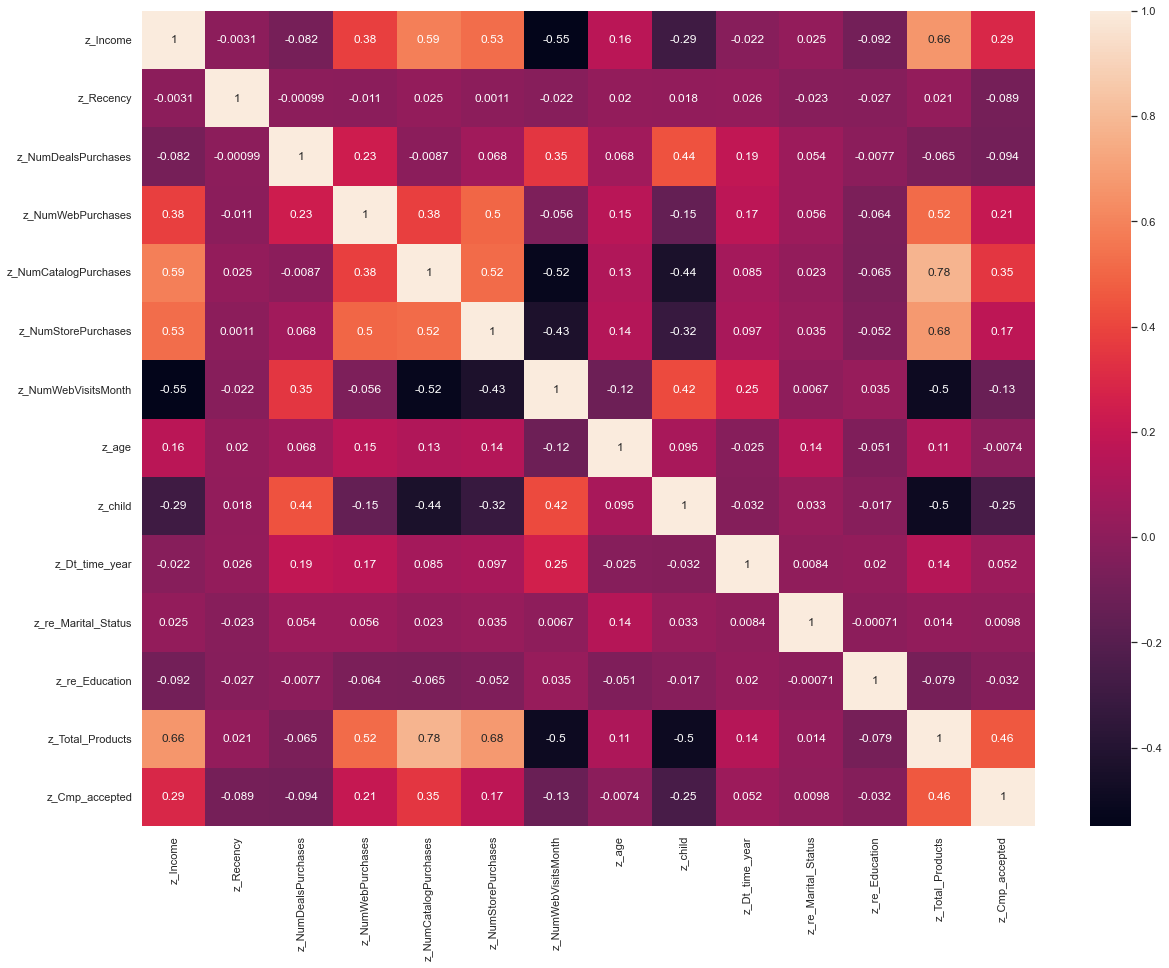

In [235]:
plt.figure(figsize=(20,15))
sns.heatmap(data_z.corr(),annot=True)

In [236]:
pca = PCA()
pca.fit(data_z)

PCA()

In [237]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.29220231, 0.41812762, 0.5077962 , 0.58363954, 0.65481717,
       0.72260504, 0.78037218, 0.83705967, 0.88235827, 0.91718333,
       0.94701744, 0.96957627, 0.98919665, 1.        ])

Text(0, 0.5, 'cumculative explained variance')

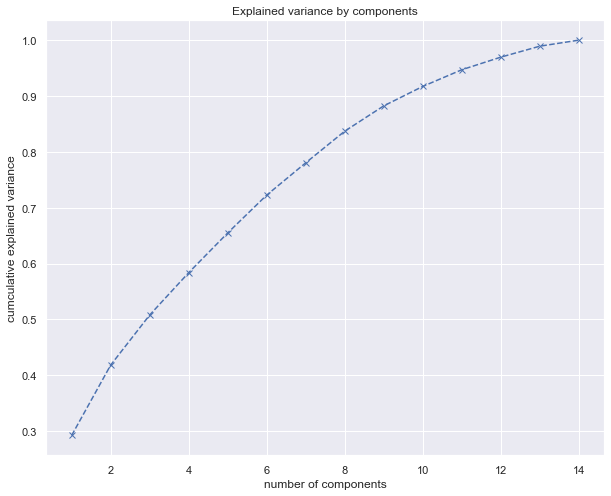

In [239]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumculative explained variance')

In [240]:
dpc=pd.DataFrame(pca.components_.T,
                index=cols,
                columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)

dpc.style.applymap(lambda e: 'background-color:yellow' if np.abs(e)>.5 else 'background-color:white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Income,0.387600,0.006500,-0.156500,-0.020400,-0.055300,-0.120500,0.031100,0.069500,0.242800,0.552800,0.330200,0.552800,0.083500,0.123500
Recency,0.000500,0.010900,-0.127700,-0.761900,0.363100,0.340200,0.323200,0.197900,-0.085700,0.022000,-0.037700,0.038900,-0.023300,0.024700
NumDealsPurchases,-0.073100,0.604700,-0.039400,-0.048000,-0.052600,-0.251800,0.044100,0.282200,0.270000,-0.434900,-0.022100,0.327700,-0.318900,-0.075600
NumWebPurchases,0.271900,0.409100,0.049600,-0.000400,-0.026100,-0.095700,-0.058100,0.081500,-0.657700,0.180000,0.327000,-0.277000,-0.280900,0.094200
NumCatalogPurchases,0.412100,0.036200,0.023600,-0.037600,0.024300,-0.001500,0.053300,0.040700,0.301800,-0.423300,0.341900,-0.352700,0.364300,0.421400
NumStorePurchases,0.371800,0.168700,-0.054100,-0.076300,0.072800,-0.171900,-0.280200,0.058900,-0.133900,0.062700,-0.751600,0.050800,0.235800,0.250500
NumWebVisitsMonth,-0.326900,0.348400,0.274300,0.057800,-0.059000,0.139600,0.113400,-0.028200,-0.297800,-0.030600,0.107100,0.312000,0.675400,0.044700
age,0.086800,0.192700,-0.572000,0.122000,0.107300,0.034000,0.288100,-0.688100,-0.106000,-0.153100,-0.034500,0.090100,0.000600,-0.009600
child,-0.290600,0.337600,-0.275200,-0.022500,-0.127900,-0.196700,0.214500,0.135000,0.299300,0.450500,-0.088500,-0.510500,0.204100,-0.058600
Dt_time_year,0.031100,0.368900,0.473100,-0.088300,0.189800,0.320900,-0.229300,-0.467600,0.355900,0.224800,-0.025200,-0.083900,-0.184000,0.047900


In [241]:
# as rule of thumb, we take the number of components that account for 80% of the explained variance
pca8 = PCA(n_components=8)

In [242]:
pca8.fit(data_z)

PCA(n_components=8)

In [243]:
pca8.transform(data_z)
score_pca8 = pca8.transform(data_z)

K means

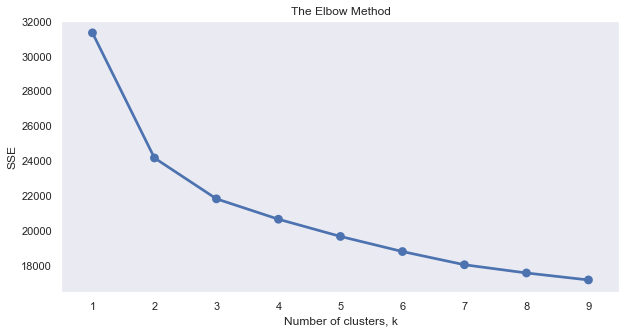

In [244]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data_z)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.figure(figsize=(10,5))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.grid()
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

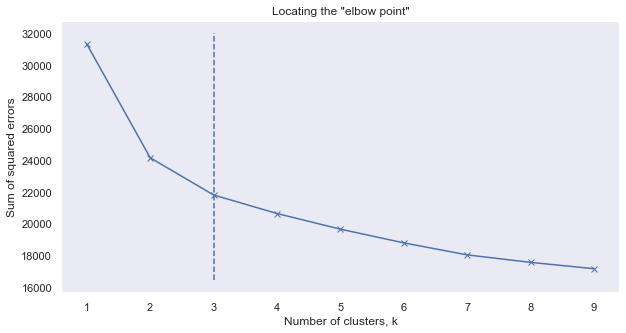

In [245]:
# Find the "elbow point" using keed.KneeLocator

x1=list(sse.keys())
y1=list(sse.values())


from kneed import KneeLocator, DataGenerator as dg
kn = KneeLocator(x1, y1, curve='convex', direction='decreasing')
#print(kn.knee)

plt.figure(figsize=(10,5))
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared errors')
plt.title('Locating the "elbow point"')
plt.grid() 
plt.plot(x1, y1, 'bx-')
plt.xticks(range(0, len(x1)+1))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [246]:
# Get silhouette_score for comparisons
from sklearn.metrics import silhouette_score
sse_silhouette = {}
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42,init='k-means++').fit(data_z)
    preds = km.predict(data_z)    
    silhouette = silhouette_score(data_z,preds)
    sse_silhouette[i] = silhouette
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.22573663482033263
Silhouette score for number of cluster(s) 3: 0.1770458343664552
Silhouette score for number of cluster(s) 4: 0.17481790292900365
Silhouette score for number of cluster(s) 5: 0.12688062139188913
Silhouette score for number of cluster(s) 6: 0.12361875290926695
Silhouette score for number of cluster(s) 7: 0.11220814754034629
Silhouette score for number of cluster(s) 8: 0.11216935789248392
Silhouette score for number of cluster(s) 9: 0.10540665715273415
Silhouette score for number of cluster(s) 10: 0.09897639218591599


For n_clusters = 2, average silhouette_score is: 0.22573663482033263
For n_clusters = 3, average silhouette_score is: 0.1770458343664552
For n_clusters = 4, average silhouette_score is: 0.17464838639871041
For n_clusters = 5, average silhouette_score is: 0.12625277766206208
For n_clusters = 6, average silhouette_score is: 0.12228301315325918


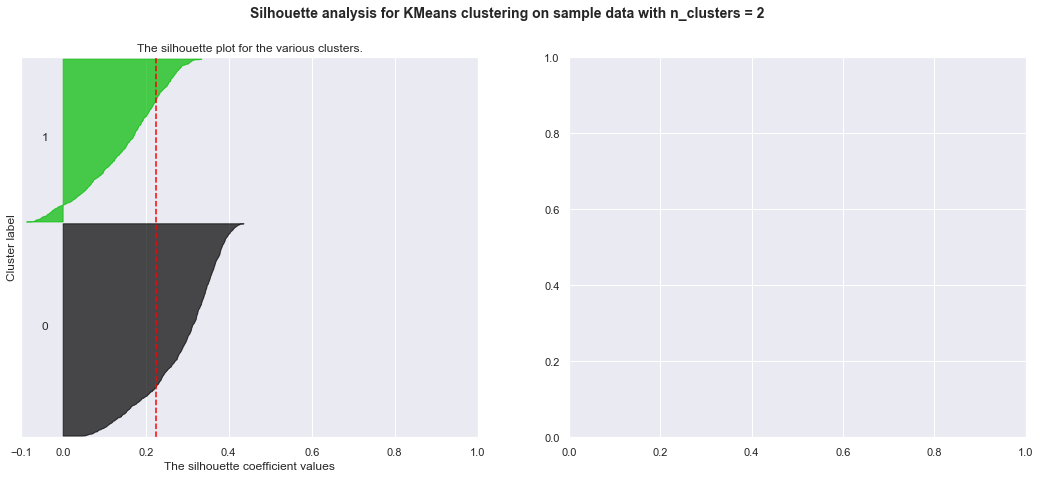

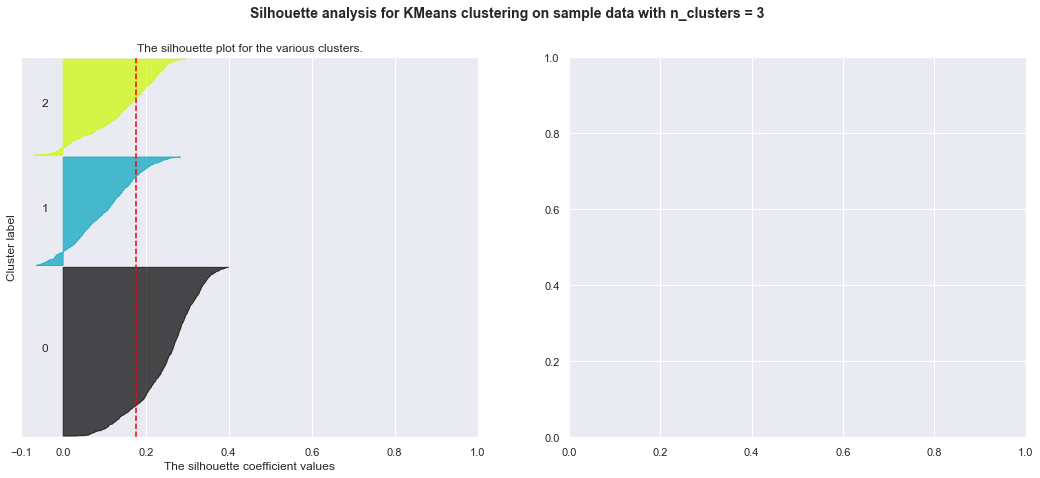

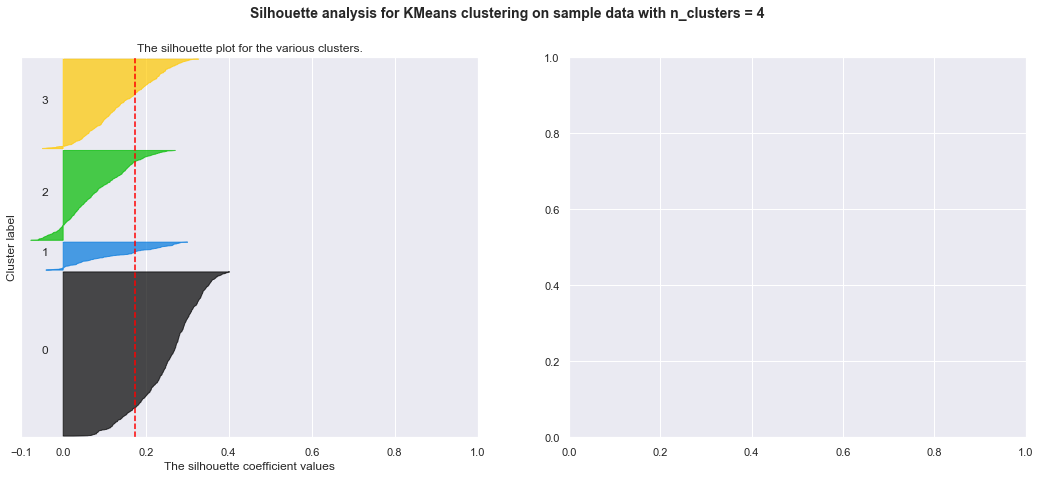

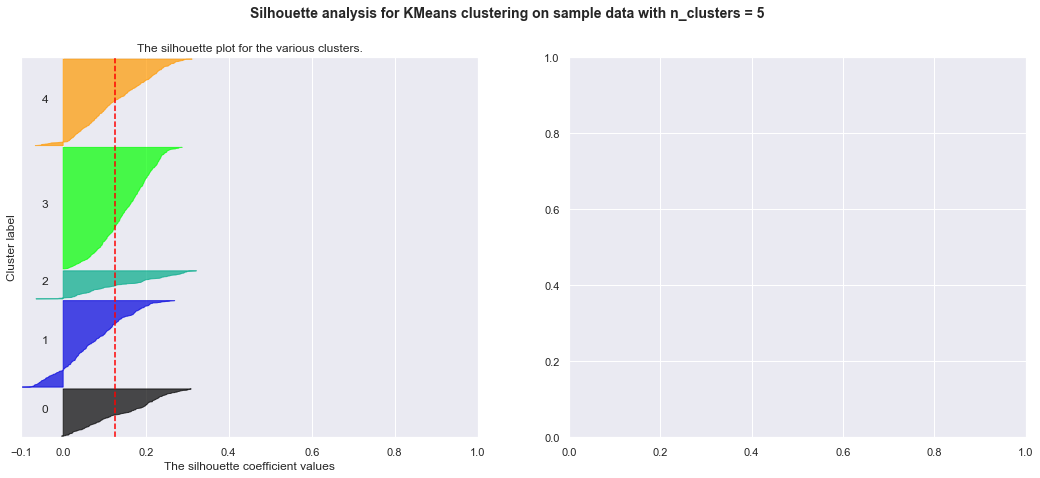

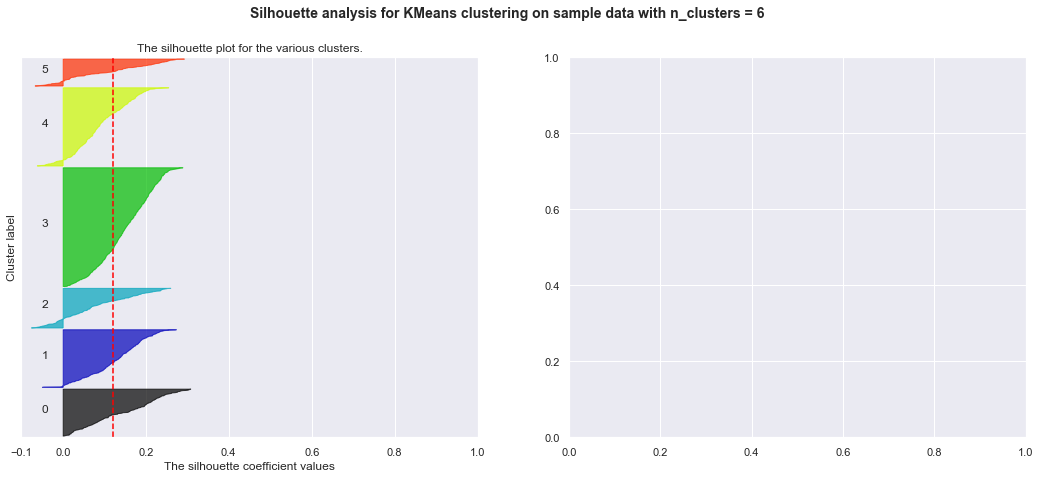

In [247]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_z) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_z, cluster_labels)
    print(f'For n_clusters = {n_clusters}, average silhouette_score is: {silhouette_avg}')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_z, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(data_std[:, 0], rfm_table_normalized[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
 #                c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [248]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_z)
model.labels_.shape

(2237,)

In [249]:
model.fit_transform(score_pca8)

array([[5.2993626 , 3.52247438, 3.2305539 ],
       [2.87486174, 4.26258675, 5.32383772],
       [3.99961809, 2.73533594, 2.04734027],
       ...,
       [4.30152021, 3.87584801, 2.76289342],
       [4.43347153, 3.33738435, 2.9923306 ],
       [2.66182593, 2.5448412 , 4.70556776]])

In [250]:
pd.DataFrame(score_pca8)

,0,1,2,3,4,5,6,7
0,2.476446,1.321485,1.385219,-0.969208,-0.614787,0.492086,0.714901,-1.687348
1,-1.883974,-0.848917,-1.687559,-0.334409,-1.441065,-1.086688,0.906911,-0.964101
2,1.740278,-0.164404,-0.104090,-0.006115,-0.662533,-0.389676,-1.395749,-0.766452
3,-1.938886,-1.285575,0.112679,0.150421,-1.359374,-0.479350,-0.627609,0.875333
4,-0.203035,0.303743,-0.741374,-1.185387,0.365845,-0.258807,0.099192,2.257102
...,...,...,...,...,...,...,...,...
2232,1.001617,0.760189,-0.386741,-0.023333,-0.470223,0.421270,-0.514386,0.076543
2233,-0.677242,2.918779,-2.156483,0.035700,-0.847861,-1.660638,2.260290,0.403491
2234,1.619131,-1.065433,-0.316733,-0.566820,0.175437,1.479948,-0.303398,1.960940
2235,1.634322,-0.287182,-1.317113,0.973415,0.068868,-2.114557,-0.328029,-0.365074


In [251]:
data_pca_kmeans = pd.concat([data.reset_index(drop=True), \
    pd.DataFrame(score_pca8)], axis=1)
data_pca_kmeans.columns.values[-8:] = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8']

data_pca_kmeans['cluster'] = model.labels_


In [252]:
data_pca_kmeans

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,child,Dt_time_year,re_Marital_Status,re_Education,Total_Products,Cmp_accepted,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,cluster
0,58138.0,58,3,8,10,4,7,65,0,10,1,1,1617,1,2.476446,1.321485,1.385219,-0.969208,-0.614787,0.492086,0.714901,-1.687348,2
1,46344.0,38,2,1,1,2,5,68,2,8,1,1,27,0,-1.883974,-0.848917,-1.687559,-0.334409,-1.441065,-1.086688,0.906911,-0.964101,0
2,71613.0,26,1,8,2,10,4,57,0,9,2,1,776,0,1.740278,-0.164404,-0.104090,-0.006115,-0.662533,-0.389676,-1.395749,-0.766452,2
3,26646.0,26,2,2,0,4,6,38,1,8,2,1,53,0,-1.938886,-1.285575,0.112679,0.150421,-1.359374,-0.479350,-0.627609,0.875333,0
4,58293.0,94,5,5,3,6,5,41,1,8,3,2,422,0,-0.203035,0.303743,-0.741374,-1.185387,0.365845,-0.258807,0.099192,2.257102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,61223.0,46,2,9,3,4,5,55,1,9,3,1,1341,0,1.001617,0.760189,-0.386741,-0.023333,-0.470223,0.421270,-0.514386,0.076543,1
2233,64014.0,56,7,8,2,5,7,76,3,8,2,2,444,1,-0.677242,2.918779,-2.156483,0.035700,-0.847861,-1.660638,2.260290,0.403491,1
2234,56981.0,91,1,2,3,13,6,41,0,8,4,1,1241,1,1.619131,-1.065433,-0.316733,-0.566820,0.175437,1.479948,-0.303398,1.960940,2
2235,69245.0,8,2,6,5,10,3,66,1,8,2,3,843,0,1.634322,-0.287182,-1.317113,0.973415,0.068868,-2.114557,-0.328029,-0.365074,2


<AxesSubplot:xlabel='pc2', ylabel='pc1'>

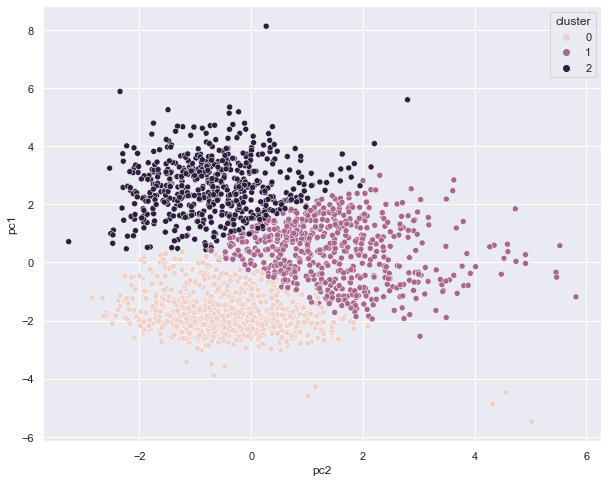

In [253]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc2', y='pc1', data=data_pca_kmeans, hue='cluster', hue_order=['First', 'Second','Third'])

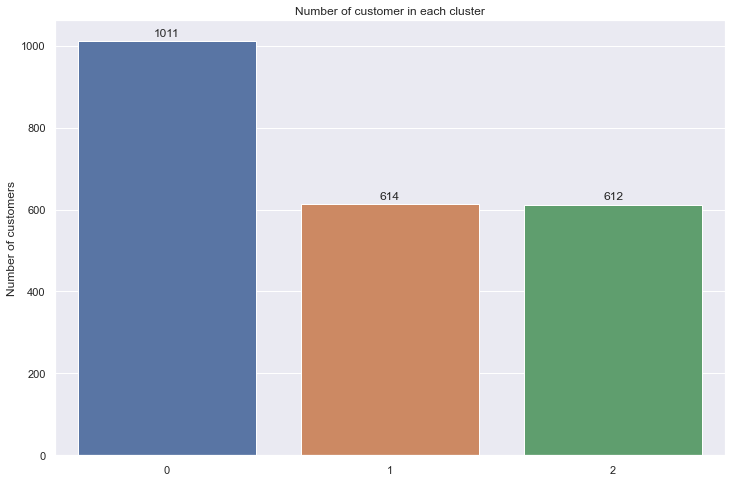

In [254]:
plt.figure(figsize=(12,8))
plots = sns.countplot(data=data_pca_kmeans,x='cluster')
plt.ylabel('Number of customers')
plt.title('Number of customer in each cluster')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0,8),
                       textcoords='offset points')

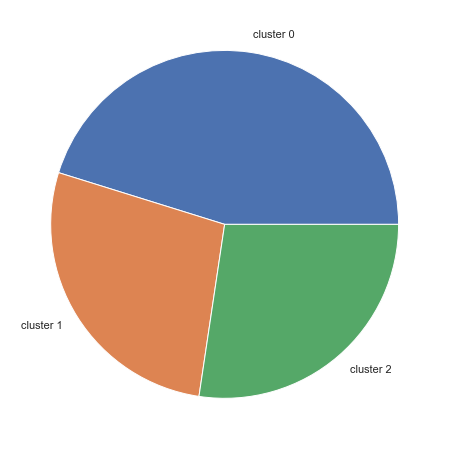

In [130]:
plt.figure(figsize = (8,8))
pie = data_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['cluster 0', 'cluster 1', 'cluster 2']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

In [132]:
data_pca_kmeans

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,child,Dt_time_year,re_Marital_Status,re_Education,Total_Products,Cmp_accepted,cluster,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,58138.0,58,3,8,10,4,7,65,0,10,1,1,1617,1,2,2.476446,1.321485,1.385219,-0.969208,-0.614787,0.492086,0.714901,-1.687348
1,46344.0,38,2,1,1,2,5,68,2,8,1,1,27,0,0,-1.883974,-0.848917,-1.687559,-0.334409,-1.441065,-1.086688,0.906911,-0.964101
2,71613.0,26,1,8,2,10,4,57,0,9,2,1,776,0,2,1.740278,-0.164404,-0.104090,-0.006115,-0.662533,-0.389676,-1.395749,-0.766452
3,26646.0,26,2,2,0,4,6,38,1,8,2,1,53,0,0,-1.938886,-1.285575,0.112679,0.150421,-1.359374,-0.479350,-0.627609,0.875333
4,58293.0,94,5,5,3,6,5,41,1,8,3,2,422,0,1,-0.203035,0.303743,-0.741374,-1.185387,0.365845,-0.258807,0.099192,2.257102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,61223.0,46,2,9,3,4,5,55,1,9,3,1,1341,0,1,1.001617,0.760189,-0.386741,-0.023333,-0.470223,0.421270,-0.514386,0.076543
2233,64014.0,56,7,8,2,5,7,76,3,8,2,2,444,1,1,-0.677242,2.918779,-2.156483,0.035700,-0.847861,-1.660638,2.260290,0.403491
2234,56981.0,91,1,2,3,13,6,41,0,8,4,1,1241,1,2,1.619131,-1.065433,-0.316733,-0.566820,0.175437,1.479948,-0.303398,1.960940
2235,69245.0,8,2,6,5,10,3,66,1,8,2,3,843,0,2,1.634322,-0.287182,-1.317113,0.973415,0.068868,-2.114557,-0.328029,-0.365074


In [133]:
#age cluster
age_clus = data_pca_kmeans.loc[:,["age","cluster"]]
age_clus

,age,cluster
0,65,2
1,68,0
2,57,2
3,38,0
4,41,1
...,...,...
2232,55,1
2233,76,1
2234,41,2
2235,66,2


In [134]:
#each cluster age_mean
mean_clus = age_clus.groupby("cluster").mean().reset_index()
mean_clus["cluster"] = mean_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
mean_clus

,cluster,age
0,cluster_0,50.365974
1,cluster_1,56.757329
2,cluster_2,53.941176


In [135]:
fig_mean = ps.bar(mean_clus,x="cluster",y="age",color=mean_clus.cluster)
fig_mean.show()

In [136]:
#Education
data_edu = data_pca_kmeans.loc[:,['re_Education']]
data_edu['cluster'] = model.labels_
data_edu

,re_Education,cluster
0,1,2
1,1,0
2,1,2
3,1,0
4,2,1
...,...,...
2232,1,1
2233,2,1
2234,1,2
2235,3,2


In [137]:
education = {
    1:'Graduation',
    2:'PhD',
    3:'Master',
    4:'Basic',
    5:'2n Cycle'
}

data_edu['education'] = data_edu['re_Education'].map(education)


In [138]:
data_edu

,re_Education,cluster,education
0,1,2,Graduation
1,1,0,Graduation
2,1,2,Graduation
3,1,0,Graduation
4,2,1,PhD
...,...,...,...
2232,1,1,Graduation
2233,2,1,PhD
2234,1,2,Graduation
2235,3,2,Master


In [139]:
ed_clus = data_edu
ed_clus["count"] = 1
ed_clus["cluster"] = ed_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
ed_clus = ed_clus.groupby(["education","cluster"]).sum().reset_index()

In [140]:
fit = ps.bar(ed_clus,x="education",y="count",color="cluster",barmode="group")
fit.update_layout(title="Education and cluster")
fit.show()

In [266]:
#Marital status
data_status = data_pca_kmeans.loc[:,['re_Marital_Status']]
data_status['cluster'] = model.labels_
data_status

,re_Marital_Status,cluster
0,1,2
1,1,0
2,2,2
3,2,0
4,3,1
...,...,...
2232,3,1
2233,2,1
2234,4,2
2235,2,2


In [267]:
relationship = {
    1:'Single',
    2:'Together',
    3:'Married',
    4:'Divorced',
    5:'Widow',
    6:'Alone',
    7:'Absurd',
    8:'YOLO'
}
data_status['status'] = data_status['re_Marital_Status'].map(relationship)

In [268]:
data_status

,re_Marital_Status,cluster,status
0,1,2,Single
1,1,0,Single
2,2,2,Together
3,2,0,Together
4,3,1,Married
...,...,...,...
2232,3,1,Married
2233,2,1,Together
2234,4,2,Divorced
2235,2,2,Together


*****probem*****

In [269]:
status_clus = data_status
status_clus["count"] = 1
status_clus["cluster"] = status_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
status_clus = status_clus.groupby(["status","cluster"]).sum().reset_index()

In [270]:
fit = ps.bar(status_clus,x="status",y="count",color="cluster",barmode="group")
fit.update_layout(title="Marital Status and cluster")
fit.show()

In [148]:
#income cluster
income_clus = data_pca_kmeans.loc[:,["Income","cluster"]]
income_clus

,Income,cluster
0,58138.0,2
1,46344.0,0
2,71613.0,2
3,26646.0,0
4,58293.0,1
...,...,...
2232,61223.0,1
2233,64014.0,1
2234,56981.0,2
2235,69245.0,2


In [149]:
income_mean_clus = income_clus.groupby("cluster").mean().reset_index()
income_mean_clus["cluster"] = income_mean_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
income_mean_clus

,cluster,Income
0,cluster_0,34712.198089
1,cluster_1,56515.322084
2,cluster_2,76893.870924


In [150]:
income_mean = ps.bar(income_mean_clus,x="cluster",y="Income",color=income_mean_clus.cluster)
income_mean.show()

In [151]:
#consumption cluster
con_clus = data_pca_kmeans.loc[:,["Total_Products","cluster"]]
con_clus

,Total_Products,cluster
0,1617,2
1,27,0
2,776,2
3,53,0
4,422,1
...,...,...
2232,1341,1
2233,444,1
2234,1241,2
2235,843,2


In [152]:
#consumption mean
con_mean_clus = con_clus.groupby("cluster").mean().reset_index()
con_mean_clus["cluster"] = con_mean_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
con_mean_clus

,cluster,Total_Products
0,cluster_0,94.023739
1,cluster_1,728.413681
2,cluster_2,1328.013072


In [153]:
con_mean = ps.bar(con_mean_clus,x="cluster",y="Total_Products",color=con_mean_clus.cluster)
con_mean.show()

In [154]:
#purchase place
df_place = data_pca_kmeans.loc[:,['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]
df_place['cluster'] = model.labels_
df_place

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
0,8,10,4,7,2
1,1,1,2,5,0
2,8,2,10,4,2
3,2,0,4,6,0
4,5,3,6,5,1
...,...,...,...,...,...
2232,9,3,4,5,1
2233,8,2,5,7,1
2234,2,3,13,6,2
2235,6,5,10,3,2


In [156]:
#web
df_place_web = df_place['NumWebPurchases'].sum(axis=0)
df_place_web_0 = df_place['NumWebPurchases'].where(data_pca_kmeans.cluster == 0).sum(axis=0)
df_place_web_1 = df_place['NumWebPurchases'].where(data_pca_kmeans.cluster == 1).sum(axis=0)
df_place_web_2 = df_place['NumWebPurchases'].where(data_pca_kmeans.cluster == 2).sum(axis=0)

#catalog
df_place_cat = df_place['NumCatalogPurchases'].sum(axis=0)
df_place_cat_0 = df_place['NumCatalogPurchases'].where(data_pca_kmeans.cluster == 0).sum(axis=0)
df_place_cat_1 = df_place['NumCatalogPurchases'].where(data_pca_kmeans.cluster == 1).sum(axis=0)
df_place_cat_2 = df_place['NumCatalogPurchases'].where(data_pca_kmeans.cluster == 2).sum(axis=0)

#store
df_place_store = df_place['NumStorePurchases'].sum(axis=0)
df_place_store_0 = df_place['NumStorePurchases'].where(data_pca_kmeans.cluster == 0).sum(axis=0)
df_place_store_1 = df_place['NumStorePurchases'].where(data_pca_kmeans.cluster == 1).sum(axis=0)
df_place_store_2 = df_place['NumStorePurchases'].where(data_pca_kmeans.cluster == 2).sum(axis=0)

#web visits
df_place_webvisit = df_place['NumWebVisitsMonth'].sum(axis=0)
df_place_webvisit_0 = df_place['NumWebVisitsMonth'].where(data_pca_kmeans.cluster == 0).sum(axis=0)
df_place_webvisit_1 = df_place['NumWebVisitsMonth'].where(data_pca_kmeans.cluster == 1).sum(axis=0)
df_place_webvisit_2 = df_place['NumWebVisitsMonth'].where(data_pca_kmeans.cluster == 2).sum(axis=0)

In [161]:
cluster =('cluster_0, cluster_1,cluster_2, Total')
place = {'NumWebPurchases': [df_place_web_0, df_place_web_1,df_place_web_2, df_place_web],
               'NumCatalogPurchases': [df_place_cat_0, df_place_cat_1,df_place_cat_2, df_place_cat],
               'NumStorePurchases': [df_place_store_0, df_place_store_1,df_place_store_2, df_place_store],
               'NumWebVisitsMonth': [df_place_webvisit_0, df_place_webvisit_1,df_place_webvisit_2, df_place_webvisit],
               'cluster' : ['cluster_0', 'cluster_1', 'cluster_2','Total']}

df_purchase_place = pd.DataFrame(place)
df_purchase_place

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
0,2067.0,534.0,3240.0,6469.0,cluster_0
1,3973.0,1852.0,4588.0,3750.0,cluster_1
2,3103.0,3570.0,5134.0,1680.0,cluster_2
3,9143.0,5956.0,12962.0,11899.0,Total


In [162]:
#place that customer buy in each cluster
df_purchase_place.set_index('cluster')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
cluster,,,,
cluster_0,2067.0,534.0,3240.0,6469.0
cluster_1,3973.0,1852.0,4588.0,3750.0
cluster_2,3103.0,3570.0,5134.0,1680.0
Total,9143.0,5956.0,12962.0,11899.0


In [271]:
#accpet campaign
df_cam = data_pca_kmeans.loc[:,['Cmp_accepted']]
df_cam['cluster'] = model.labels_
df_cam

,Cmp_accepted,cluster
0,1,2
1,0,0
2,0,2
3,0,0
4,0,1
...,...,...
2232,0,1
2233,1,1
2234,1,2
2235,0,2


In [272]:
cam_clus = df_cam
cam_clus["count"] = 1
cam_clus["cluster"] = cam_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
cam_clus = cam_clus.groupby(["Cmp_accepted","cluster"]).sum().reset_index()

In [273]:
fit = ps.bar(cam_clus,x="Cmp_accepted",y="count",color="cluster",barmode="group")
fit.update_layout(title="Campaign Accepted and cluster")
fit.show()

In [164]:
data_pca_kmeans

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,child,Dt_time_year,re_Marital_Status,re_Education,Total_Products,Cmp_accepted,cluster,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,58138.0,58,3,8,10,4,7,65,0,10,1,1,1617,1,2,2.476446,1.321485,1.385219,-0.969208,-0.614787,0.492086,0.714901,-1.687348
1,46344.0,38,2,1,1,2,5,68,2,8,1,1,27,0,0,-1.883974,-0.848917,-1.687559,-0.334409,-1.441065,-1.086688,0.906911,-0.964101
2,71613.0,26,1,8,2,10,4,57,0,9,2,1,776,0,2,1.740278,-0.164404,-0.104090,-0.006115,-0.662533,-0.389676,-1.395749,-0.766452
3,26646.0,26,2,2,0,4,6,38,1,8,2,1,53,0,0,-1.938886,-1.285575,0.112679,0.150421,-1.359374,-0.479350,-0.627609,0.875333
4,58293.0,94,5,5,3,6,5,41,1,8,3,2,422,0,1,-0.203035,0.303743,-0.741374,-1.185387,0.365845,-0.258807,0.099192,2.257102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,61223.0,46,2,9,3,4,5,55,1,9,3,1,1341,0,1,1.001617,0.760189,-0.386741,-0.023333,-0.470223,0.421270,-0.514386,0.076543
2233,64014.0,56,7,8,2,5,7,76,3,8,2,2,444,1,1,-0.677242,2.918779,-2.156483,0.035700,-0.847861,-1.660638,2.260290,0.403491
2234,56981.0,91,1,2,3,13,6,41,0,8,4,1,1241,1,2,1.619131,-1.065433,-0.316733,-0.566820,0.175437,1.479948,-0.303398,1.960940
2235,69245.0,8,2,6,5,10,3,66,1,8,2,3,843,0,2,1.634322,-0.287182,-1.317113,0.973415,0.068868,-2.114557,-0.328029,-0.365074


In [260]:
#child
df_child = data_pca_kmeans.loc[:,['child']]
df_child['cluster'] = model.labels_
df_child

,child,cluster
0,0,2
1,2,0
2,0,2
3,1,0
4,1,1
...,...,...
2232,1,1
2233,3,1
2234,0,2
2235,1,2


In [264]:
child_clus = df_child
child_clus["count"] = 1
child_clus["cluster"] = child_clus["cluster"].replace({0:"cluster_0",1:"cluster_1",2:"cluster_2"})
child_clus = child_clus.groupby(["child","cluster"]).sum().reset_index()

In [265]:
fit = ps.bar(child_clus,x="child",y="count",color="cluster",barmode="group")
fit.update_layout(title="children and cluster")
fit.show()